In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Erdos-Renyi Simulations

In [2]:
def my_draw(tree, draw_path=True):
    #layout = hierarchyc_pos(tree, 0)
    layout = nx.spring_layout(tree)
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    #if draw_path:
    #    path_cover,_=util.path_cover(tree)
    #    nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
    #    
    #    other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
    #    nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    #else:
    nx.draw_networkx_edges(tree, pos=layout)

In [3]:
n = 20
lam = 0.7
tree = nx.erdos_renyi_graph(n, lam/n)
for u,v in tree.edges():
    tree[u][v]['weight'] = 1

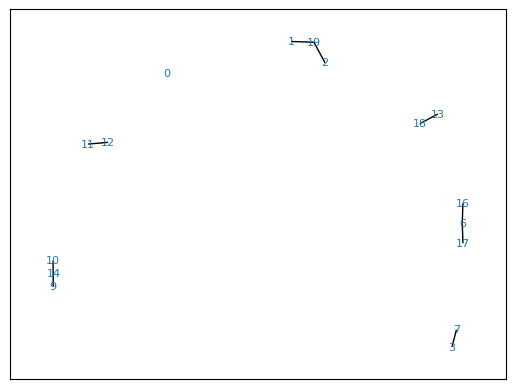

In [4]:
my_draw(tree)

In [5]:
def sim_Tn(n, lam=0.7):
    # Generate Erdos-Renyi graph (G(n,lam/n))
    tree = nx.erdos_renyi_graph(n, lam/n)
    for u,v in tree.edges():
        tree[u][v]['weight'] = 1
        
    T_n = 0
    for nodes in nx.connected_components(tree):
        subgraph = tree.subgraph(nodes)
        
        #print(subgraph.edges())
        path, _, X = util.path_cover(subgraph, list(nodes)[0])
        T_n += X
        
    return T_n, nx.number_connected_components(tree)

In [ ]:
def sim_expectation_X(num_samples, n, lam):
    Xs = 0
    for i in range(num_samples):
        X, k = sim_Tn(n, lam)
        Xs += X
        print(Xs / k)

In [8]:
# Expectation of single sample X
n = 100
lam = 0.7
num_samples = 100

Xs = 0
for i in range(num_samples):
    X, k = sim_Tn(n, lam)
    Xs += X
    print(Xs / k)

0.625
1.3703703703703705
1.463768115942029
2.125
2.4558823529411766
3.4655172413793105
3.7142857142857144
3.3376623376623376
5.3090909090909095
5.559322033898305
5.918032786885246
6.779661016949152
6.085714285714285
7.030769230769231
7.253731343283582
8.508196721311476
8.746031746031745
8.803030303030303
9.951612903225806
11.945454545454545
9.5
11.234375
10.507042253521126
12.80327868852459
15.807692307692308
12.304347826086957
11.486842105263158
12.704225352112676
17.10909090909091
13.857142857142858
14.434782608695652
14.81159420289855
17.93220338983051
17.349206349206348
17.59375
19.065573770491802
19.62295081967213
20.229508196721312
22.31578947368421
19.71212121212121
20.8125
21.634920634920636
19.041095890410958
25.963636363636365
21.776119402985074
21.271428571428572
22.64179104477612
27.29824561403509
24.446153846153845
27.066666666666666
25.875
24.420289855072465
26.8125
22.584415584415584
26.818181818181817
29.096774193548388
30.114754098360656
28.303030303030305
27.478260869

In [ ]:
values = {n:sim_Tn(n, lam)/n for n in range(1,300)}
x,y = zip(*sorted(values.items(), key=lambda x:x[0]))
plt.plot(x,y)
plt.xlabel("n")
plt.ylabel("T_n/n")

In [ ]:
list(values.items())[:10]